In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Data Load

In [124]:
#Link with google drive
train_data = pd.read_csv("/content/drive/MyDrive/assignment1/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/assignment1/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/assignment1/sample_submission.csv")

In [125]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [126]:
# Display summary statistics of train_data
print("Summary statistics of train data:")
print(train_data.describe())


Summary statistics of train data:
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [127]:
print("Info of train data:")
train_data.info()

Info of train data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [128]:
# Display columns in train data
print("Columns in train data:")
print(train_data.columns)

Columns in train data:
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [129]:
# Handle missing values
train_data.dropna(inplace=True)

In [130]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Visualizations for Exploratory Data Analysis (EDA)

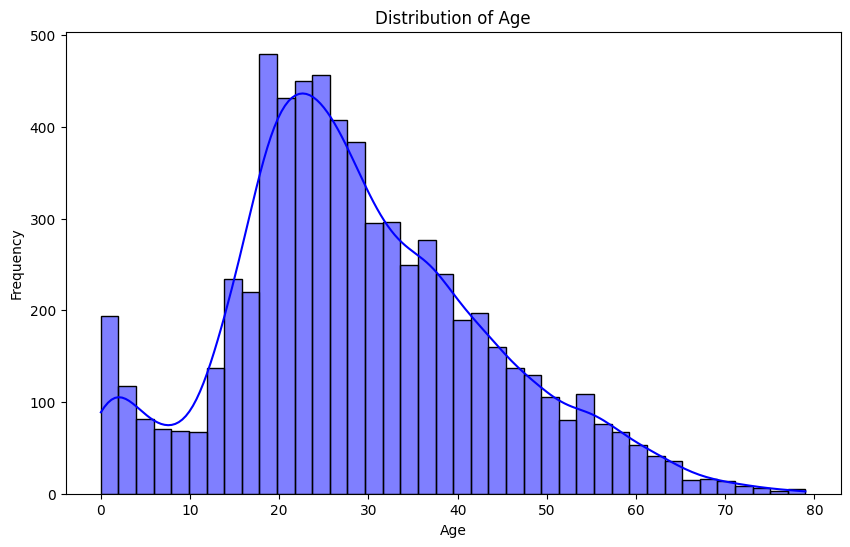

In [131]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], kde=True, color="blue")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

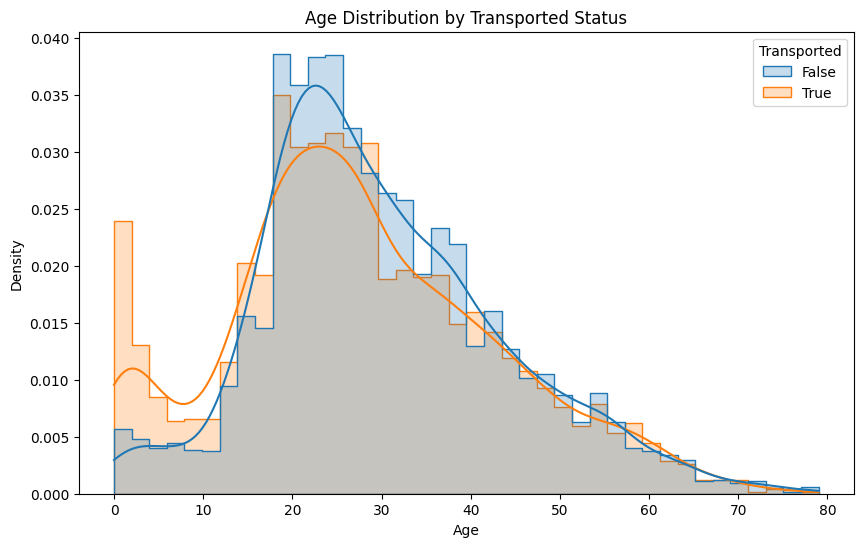

In [132]:
# Age Distribution by Transported Status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Transported', kde=True, element="step", stat="density", common_norm=False)
plt.title('Age Distribution by Transported Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<ipython-input-133-7d275aaf1a5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='HomePlanet', palette='coolwarm')


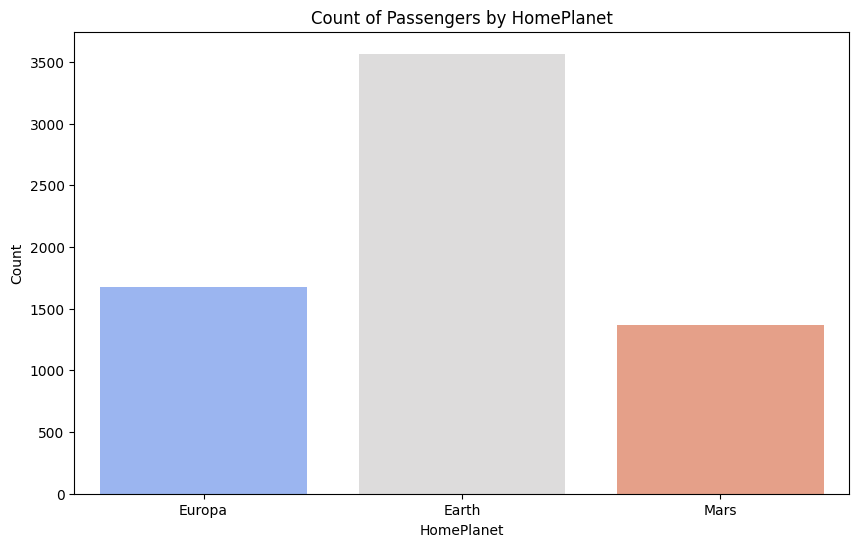

In [133]:
# Count of passengers by HomePlanet
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='HomePlanet', palette='coolwarm')
plt.title('Count of Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.show()

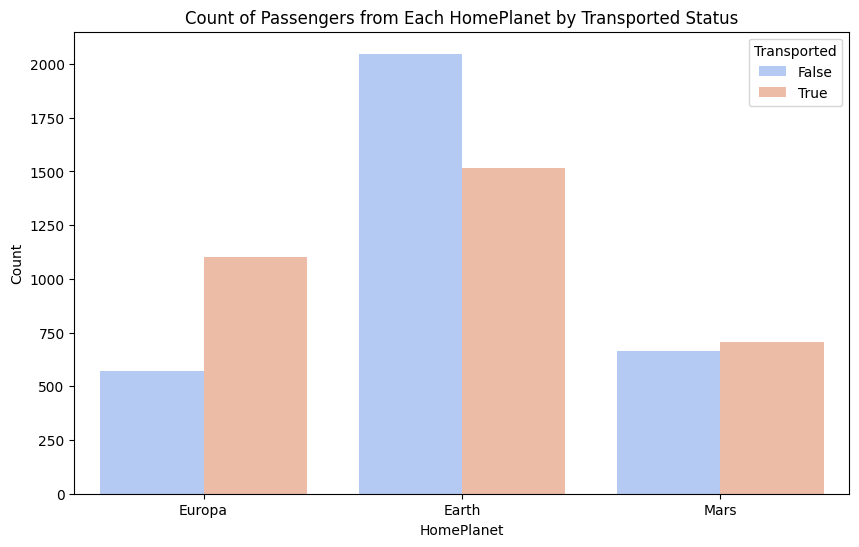

In [134]:
# Count Plot for HomePlanet
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='HomePlanet', hue='Transported', palette='coolwarm')
plt.title('Count of Passengers from Each HomePlanet by Transported Status')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.show()


<ipython-input-135-5165ae6fa132>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Transported', palette='viridis')


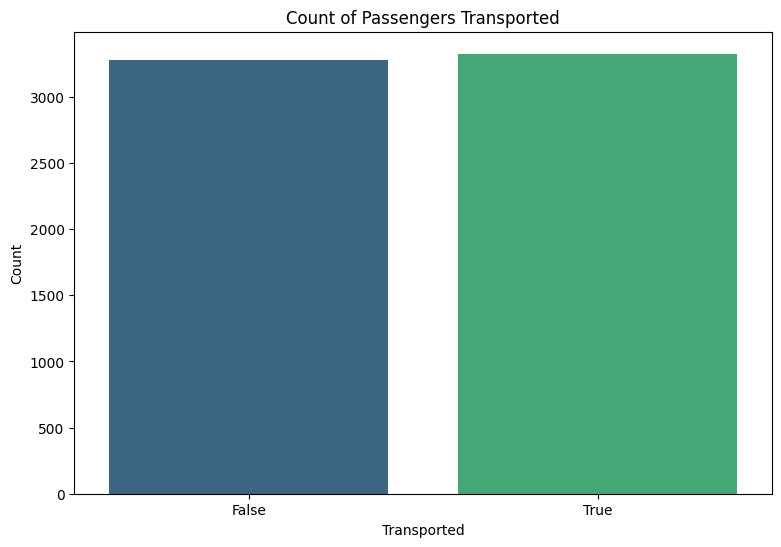

In [135]:
# Count of passengers Transported vs. Not Transported
plt.figure(figsize=(9, 6))
sns.countplot(data=train_data, x='Transported', palette='viridis')
plt.title('Count of Passengers Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show()

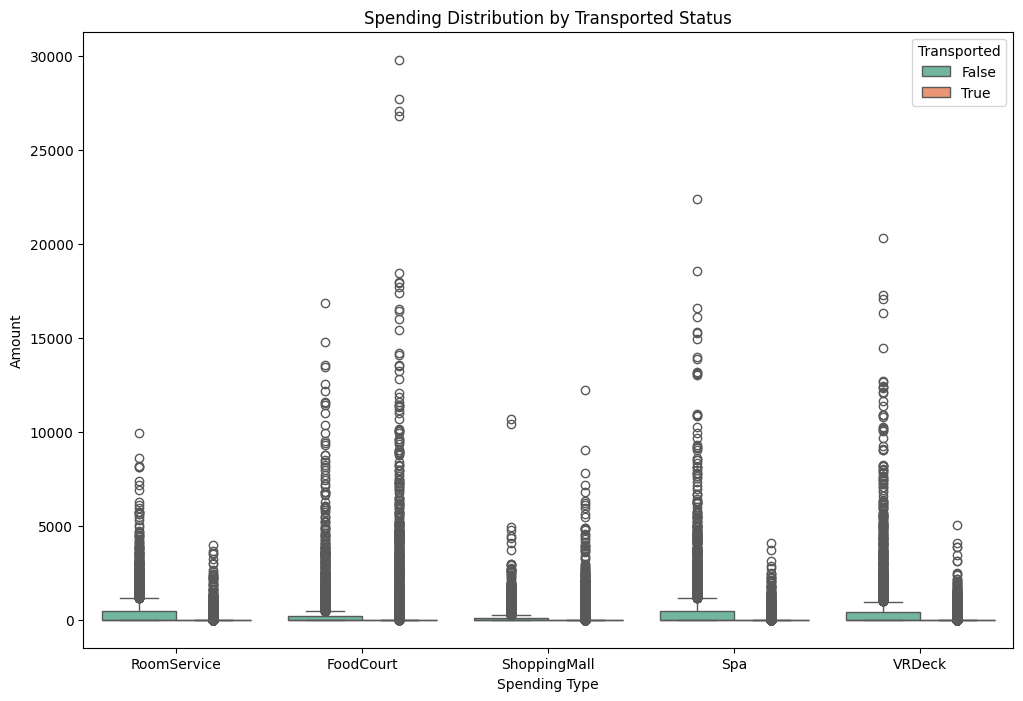

In [136]:
# Boxplot of spending by Transported
spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(12, 8))
train_data_melted = pd.melt(train_data, id_vars=['Transported'], value_vars=spending_columns, var_name='Spending Type', value_name='Amount')
sns.boxplot(x='Spending Type', y='Amount', hue='Transported', data=train_data_melted, palette='Set2')
plt.title('Spending Distribution by Transported Status')
plt.show()

<ipython-input-137-7fbd31bd1b95>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap='vlag')


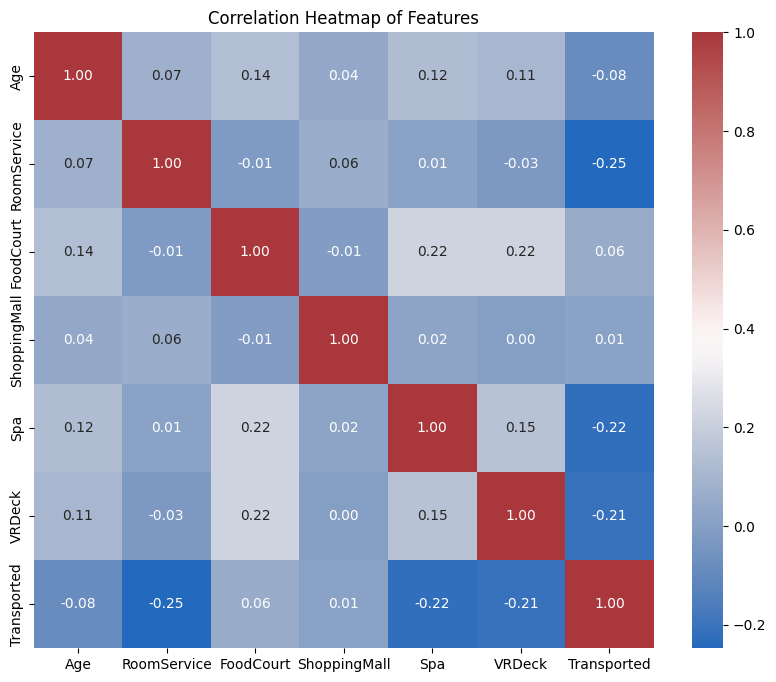

In [137]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap='vlag')
plt.title('Correlation Heatmap of Features')
plt.show()

# Feature Selection

In [138]:
# Separate target from predictors
X = train_data.drop(['Transported'], axis=1)
y = train_data['Transported'].astype(int)  # Ensure the target is integer


In [139]:
# Identify categorical and numerical columns
categorical_cols = [cname for cname in X.columns if
                  X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if
                  X[cname].dtype in ['int64', 'float64']]

In [140]:
categorical_cols

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [141]:
numerical_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [142]:
# Define the ColumnTransformer to apply different preprocessing to categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [143]:
preprocessor

ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'),
                                 ['Age', 'RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['PassengerId', 'HomePlanet', 'CryoSleep',
                                  'Cabin', 'Destination', 'VIP', 'Name'])])

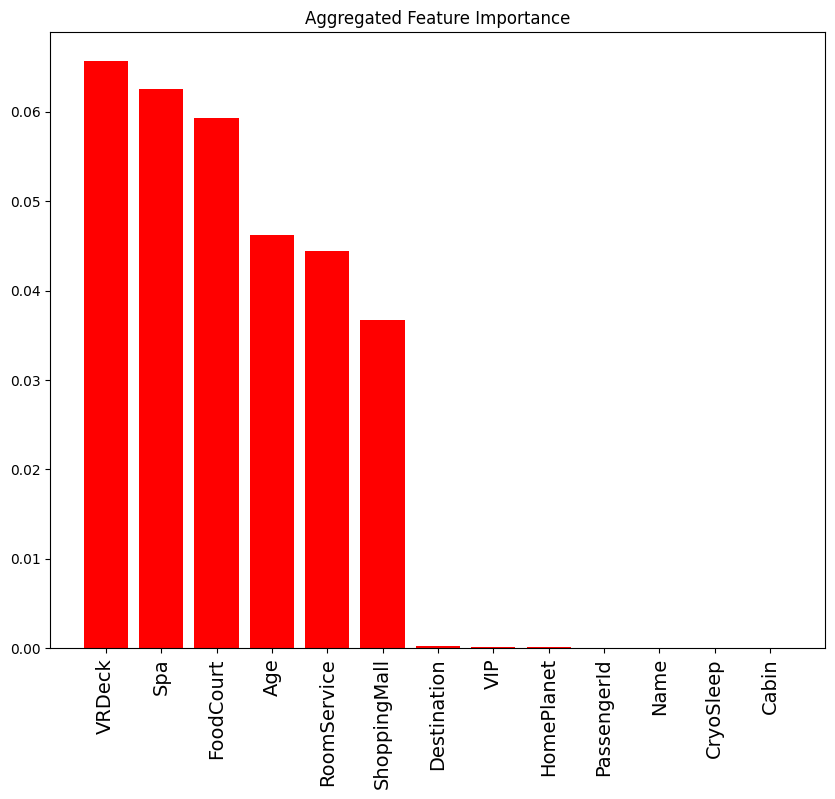

In [144]:

model = RandomForestRegressor(n_estimators=100, random_state=42)


pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

# Extract feature importance
feature_importances = pipeline.named_steps['model'].feature_importances_

# For one-hot encoded features, extract the original feature names from the transformed feature names
original_feature_names = numerical_cols.copy()

# Adding categorical feature names directly assuming each represents the aggregated importance of its categories
original_feature_names.extend(categorical_cols)

# Create a dictionary to sum feature importances for each original feature name
feature_importance_dict = dict.fromkeys(original_feature_names, 0)

# Update dictionary with actual importances
for i, feature_name in enumerate(original_feature_names):
    # For each original feature, add its importance. If it's a one-hot encoded feature, add it to its respective original feature's importance
    if feature_name in feature_importance_dict:
        feature_importance_dict[feature_name] += feature_importances[i]
    else:
        # This handles the one-hot encoded features
        original_name = feature_name.split("_")[0]
        if original_name in feature_importance_dict:
            feature_importance_dict[original_name] += feature_importances[i]

# Now, create lists for the names and importances, sorted by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Unpack the sorted items
sorted_feature_names, sorted_importances = zip(*sorted_features)

# Visualize Feature Importance for aggregated features
plt.figure(figsize=(10, 8))
plt.title("Aggregated Feature Importance")
plt.bar(range(len(sorted_feature_names)), sorted_importances, color="r", align="center")
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90, fontsize=14)
plt.xlim([-1, len(sorted_feature_names)])
plt.show()


# Model Apply Random Forest

In [145]:
# Dropping unnecessary columns
X = X.drop(["CryoSleep", "Cabin", "Name", "PassengerId", "HomePlanet"], axis=1)


In [146]:
# Updating the lists of categorical and numerical columns after dropping
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object" and cname not in ["CryoSleep", "Cabin", "Name", "PassengerId"]]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])



In [147]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])



In [148]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [149]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.791981845688351



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       653
           1       0.77      0.83      0.80       669

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



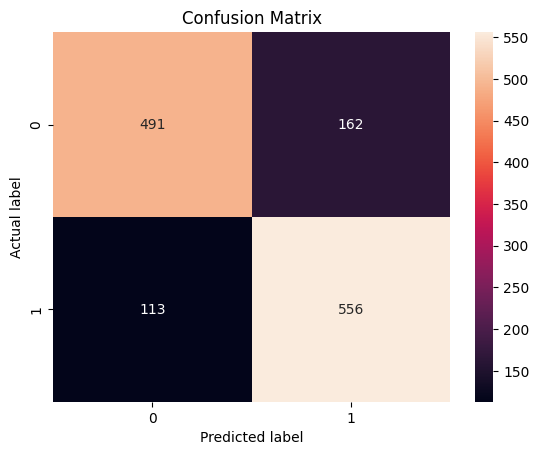

In [150]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Apply GridSearchCV to find the best Parameters

In [151]:
# Define the grid of hyperparameters to search
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__random_state': [42]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search by fitting the model
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'model__max_depth': 10, 'model__n_estimators': 50, 'model__random_state': 42}


Model Accuracy: 0.8033282904689864

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       653
           1       0.78      0.86      0.82       669

    accuracy                           0.80      1322
   macro avg       0.81      0.80      0.80      1322
weighted avg       0.81      0.80      0.80      1322



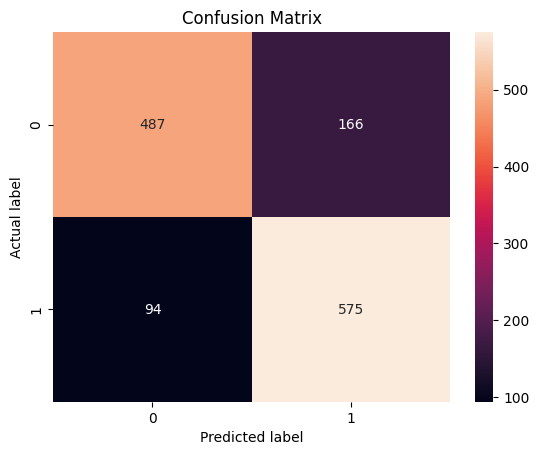

In [152]:

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()